In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
import matplotlib
%matplotlib inline

with open(('controller_log.json')) as f:
    data = json.load(f)
    
dp = len(data["1"]['raibert_action_commanded'])
ls = len(data)



In [8]:
data['1'].keys()

dict_keys(['target_speed', 'target_speed_ang', 'input_current_speed', 'input_joint_pos', 'input_current_yaw_rate', 'latent_action', 'input_base_ori_euler', 'raibert_action_commanded', 'raibert_action_measured', 'raibert_base_velocity'])

In [3]:
print(np.array(data[str(1)]['raibert_base_velocity']).shape)
num_pts = len(data.keys())
vels = np.zeros((num_pts*80, 3))
ang_vels = np.copy(vels)
target_vel = np.copy(vels)
for i in range(num_pts):
    vels[i*80:(i+1)*80,:] = np.array(data[str(i+1)]['raibert_base_velocity'])
    cur_target_vel = np.array(data[str(i+1)]['target_speed'])
    target_vel[i*80:(i+1)*80,0:2] = np.array(data[str(i+1)]['target_speed'])
    ang_vels[i*80:(i+1)*80,:]  = np.array(data[str(i+1)]['raibert_base_velocity'])

(80, 3)


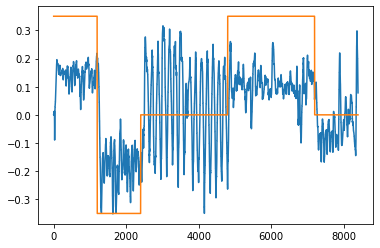

In [4]:
plt.plot(vels[:, 0])
plt.plot(target_vel[:,  0])

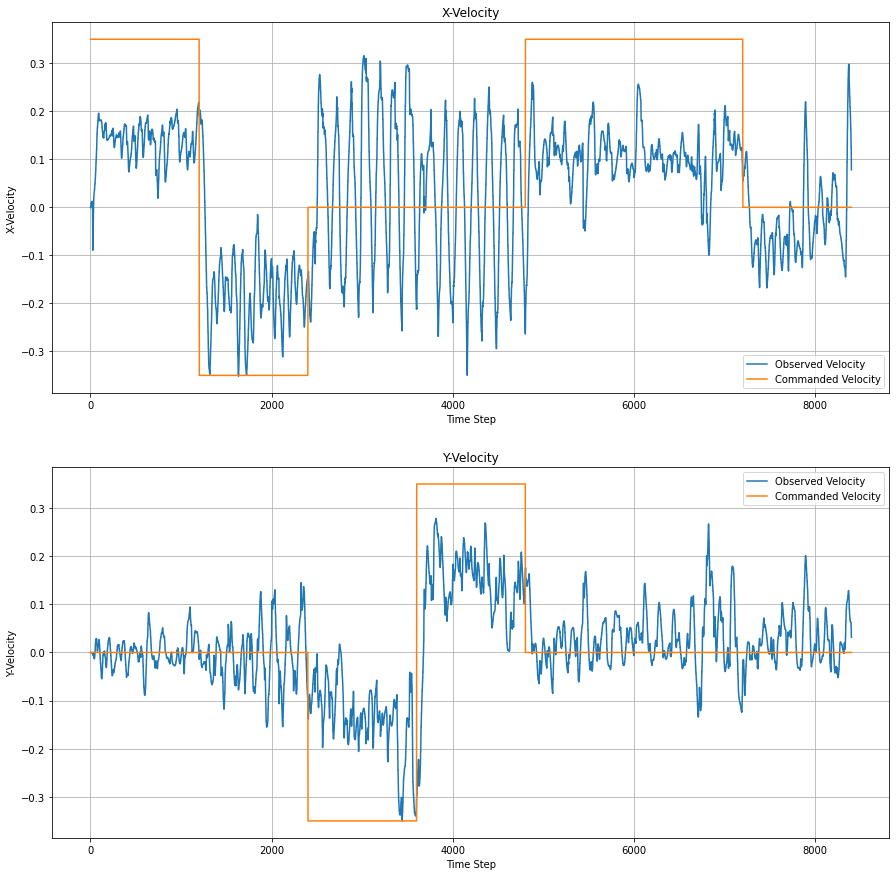

In [7]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
plt.subplot(2,1,1)
plt.plot(vels[:, 0])
plt.plot(target_vel[:,  0])
plt.legend(['Observed Velocity', 'Commanded Velocity'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('X-Velocity')
plt.title('X-Velocity')
plt.subplot(2,1,2)
plt.plot(vels[:, 1])
plt.plot(target_vel[:,  1])
plt.legend(['Observed Velocity', 'Commanded Velocity'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Y-Velocity')
plt.title('Y-Velocity')
plt.grid(True)